In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
from pypfopt import risk_models as RiskModels
from pypfopt import black_litterman
from pypfopt.black_litterman import BlackLittermanModel
from pypfopt.efficient_frontier import EfficientFrontier

In [3]:

tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0][['Symbol', 'GICS Sector']]
tickers

,Symbol,GICS Sector
0,MMM,Industrials
1,AOS,Industrials
2,ABT,Health Care
3,ABBV,Health Care
4,ACN,Information Technology
...,...,...
498,YUM,Consumer Discretionary
499,ZBRA,Information Technology
500,ZBH,Health Care
501,ZION,Financials


In [4]:
# Replace all '.' with a '-' in the symbol column
type(tickers['Symbol'])

# Internally, Pandas columns are stored as Series objects, which are essentially NumPy arrays (with some extra methods and properties)
# This is why we can use NumPy's vectorized string methods on the column at once rather than looping through each row
tickers['Symbol'] = tickers['Symbol'].str.replace('.', '-')
tickers[tickers['Symbol'] == 'BF-B']

C:\Users\vkotr\AppData\Local\Temp\ipykernel_24264\3064236297.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tickers['Symbol'] = tickers['Symbol'].str.replace('.', '-')


,Symbol,GICS Sector
80,BF-B,Consumer Staples


In [5]:
# Breakdown dataframe into keys of sectors & values of tickers
sector_breakdown = tickers.groupby('GICS Sector')['Symbol'].apply(list)
sector_breakdown = sector_breakdown.to_dict()
sector_breakdown

{'Communication Services': ['GOOGL',
  'GOOG',
  'T',
  'CHTR',
  'CMCSA',
  'DIS',
  'EA',
  'FOXA',
  'FOX',
  'IPG',
  'LYV',
  'MTCH',
  'META',
  'NFLX',
  'NWSA',
  'NWS',
  'OMC',
  'PARA',
  'TMUS',
  'TTWO',
  'VZ',
  'WBD'],
 'Consumer Discretionary': ['ABNB',
  'AMZN',
  'APTV',
  'AZO',
  'BBWI',
  'BBY',
  'BKNG',
  'BWA',
  'CZR',
  'KMX',
  'CCL',
  'CMG',
  'DHI',
  'DRI',
  'DPZ',
  'EBAY',
  'ETSY',
  'EXPE',
  'F',
  'GRMN',
  'GM',
  'GPC',
  'HAS',
  'HLT',
  'HD',
  'LVS',
  'LEN',
  'LKQ',
  'LOW',
  'LULU',
  'MAR',
  'MCD',
  'MGM',
  'MHK',
  'NKE',
  'NCLH',
  'NVR',
  'ORLY',
  'POOL',
  'PHM',
  'RL',
  'ROST',
  'RCL',
  'SBUX',
  'TPR',
  'TSLA',
  'TJX',
  'TSCO',
  'ULTA',
  'VFC',
  'WHR',
  'WYNN',
  'YUM'],
 'Consumer Staples': ['ADM',
  'MO',
  'BF-B',
  'BG',
  'CPB',
  'CHD',
  'CLX',
  'KO',
  'CL',
  'CAG',
  'STZ',
  'COST',
  'DG',
  'DLTR',
  'EL',
  'GIS',
  'HSY',
  'HRL',
  'K',
  'KVUE',
  'KDP',
  'KMB',
  'KHC',
  'KR',
  'LW',
  'MKC',

In [6]:
# Get all tickers from sector_breakdown into a single list
ticker_list = []
for sector in sector_breakdown:
    ticker_list.extend(sector_breakdown[sector])

ticker_list   

['GOOGL',
 'GOOG',
 'T',
 'CHTR',
 'CMCSA',
 'DIS',
 'EA',
 'FOXA',
 'FOX',
 'IPG',
 'LYV',
 'MTCH',
 'META',
 'NFLX',
 'NWSA',
 'NWS',
 'OMC',
 'PARA',
 'TMUS',
 'TTWO',
 'VZ',
 'WBD',
 'ABNB',
 'AMZN',
 'APTV',
 'AZO',
 'BBWI',
 'BBY',
 'BKNG',
 'BWA',
 'CZR',
 'KMX',
 'CCL',
 'CMG',
 'DHI',
 'DRI',
 'DPZ',
 'EBAY',
 'ETSY',
 'EXPE',
 'F',
 'GRMN',
 'GM',
 'GPC',
 'HAS',
 'HLT',
 'HD',
 'LVS',
 'LEN',
 'LKQ',
 'LOW',
 'LULU',
 'MAR',
 'MCD',
 'MGM',
 'MHK',
 'NKE',
 'NCLH',
 'NVR',
 'ORLY',
 'POOL',
 'PHM',
 'RL',
 'ROST',
 'RCL',
 'SBUX',
 'TPR',
 'TSLA',
 'TJX',
 'TSCO',
 'ULTA',
 'VFC',
 'WHR',
 'WYNN',
 'YUM',
 'ADM',
 'MO',
 'BF-B',
 'BG',
 'CPB',
 'CHD',
 'CLX',
 'KO',
 'CL',
 'CAG',
 'STZ',
 'COST',
 'DG',
 'DLTR',
 'EL',
 'GIS',
 'HSY',
 'HRL',
 'K',
 'KVUE',
 'KDP',
 'KMB',
 'KHC',
 'KR',
 'LW',
 'MKC',
 'TAP',
 'MDLZ',
 'MNST',
 'PEP',
 'PM',
 'PG',
 'SJM',
 'SYY',
 'TGT',
 'TSN',
 'WBA',
 'WMT',
 'APA',
 'BKR',
 'CVX',
 'COP',
 'CTRA',
 'DVN',
 'FANG',
 'EOG',
 'EQT',
 'XO

In [7]:
# Get today's date
today = pd.Timestamp.today().strftime('%Y-%m-%d')

# Get the date 1 month ago
month_ago = pd.Timestamp.today() - pd.DateOffset(months=1)

# Get data from yfinance for all tickers
data = yf.download(ticker_list, start=month_ago, end=today)

# Keep just the Adj Close column
data = data.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])
data

# IMPORTANT: Notice how yfinance doesn't throw an error for tickers like BF.B since we cleaned the inputs before extracting our dataset

[*********************100%***********************]  503 of 503 completed

1 Failed download:
- K: No data found for this date range, symbol may be delisted


Adj Close                                             \
                              A    AAL        AAPL        ABBV        ABNB   
Date                                                                         
2023-10-06 00:00:00  110.639999  12.76  177.490005  146.770905  126.360001   
2023-10-09 00:00:00  111.279999  12.24  178.990005  147.632278  127.769997   
2023-10-10 00:00:00  113.290001  12.26  178.389999  147.414459  131.589996   
2023-10-11 00:00:00  113.379997  12.48  179.800003  147.860001  130.000000   
2023-10-12 00:00:00  108.940002  12.06  180.710007  148.300003  125.970001   
2023-10-13 00:00:00  110.510002  11.72  178.850006  147.960007  124.080002   
2023-10-16 00:00:00  111.500000  11.94  178.720001  147.229996  125.190002   
2023-10-17 00:00:00  112.400002  11.94  177.149994  149.179993  125.709999   
2023-10-18 00:00:00  108.610001  11.36  175.839996  149.279999  122.169998   
2023-10-19 00:00:00  109.510002  11.45  175.460007  145.520004  119.970001   
2023-10-20 00:00:00  109.230003  11.08  172.880005  146.229996  116.489998   
2023-10-23 00:00:00  109.339996  11.29  173.000000  144.729996  120.389999   
2023-10-24 00:00:00  105.639999  11.21  173.440002  146.309998  122.010002   
2023-10-25 00:00:00  103.400002  11.04  171.100006  145.259995  118.500000   
2023-10-26 00:00:00  104.309998  11.15  166.889999  145.199997  115.470001   
2023-10-27 00:00:00  102.769997  10.92  168.220001  138.929993  114.089996   
2023-10-30 00:00:00  101.169998  11.18  170.289993  141.889999  116.949997   
2023-10-31 00:00:00  103.370003  11.15  170.770004  141.179993  118.290001   
2023-11-01 00:00:00  102.860001  11.14  173.970001  142.470001  119.470001   
2023-11-02 00:00:00  104.470001  11.40  177.570007  143.259995  115.500000   
2023-11-03 00:00:00  109.019997  11.98  176.649994  141.419998  122.639999   

                                                                               \
                           ABT       ACGL         ACN        ADBE         ADI   
Date                                                                            
2023-10-06 00:00:00  96.346657  82.180000  310.900543  526.679993  173.970001   
2023-10-09 00:00:00  96.227318  82.070000  310.721283  529.289978  173.320007   
2023-10-10 00:00:00  97.022911  81.860001  311.029999  532.719971  175.970001   
2023-10-11 00:00:00  92.129997  83.019997  312.540009  549.909973  174.919998   
2023-10-12 00:00:00  90.190002  83.050003  304.359985  559.630005  173.600006   
2023-10-13 00:00:00  90.870003  84.160004  301.829987  548.760010  171.070007   
2023-10-16 00:00:00  92.180000  85.699997  305.339996  550.739990  172.750000   
2023-10-17 00:00:00  92.139999  86.620003  308.250000  560.090027  172.610001   
2023-10-18 00:00:00  95.559998  85.449997  303.769989  557.869995  171.270004   
2023-10-19 00:00:00  95.440002  83.779999  302.940002  555.739990  168.720001   
2023-10-20 00:00:00  96.779999  82.760002  297.000000  540.960022  166.520004   
2023-10-23 00:00:00  95.779999  81.860001  294.940002  540.409973  163.869995   
2023-10-24 00:00:00  94.809998  83.419998  296.089996  539.559998  164.929993   
2023-10-25 00:00:00  93.570000  83.489998  292.679993  521.140015  159.789993   
2023-10-26 00:00:00  93.980003  82.449997  292.040009  514.280029  160.860001   
2023-10-27 00:00:00  92.849998  81.360001  290.040009  508.119995  160.570007   
2023-10-30 00:00:00  93.000000  82.879997  292.700012  526.940002  155.880005   
2023-10-31 00:00:00  94.550003  86.680000  297.089996  532.059998  157.330002   
2023-11-01 00:00:00  95.010002  90.000000  300.640015  544.500000  159.240005   
2023-11-02 00:00:00  95.959999  85.940002  308.119995  558.710022  164.339996   
2023-11-03 00:00:00  95.839996  85.550003  313.489990  563.659973  167.919998   

                     ...                                               \
                     ...       WYNN        XEL         XOM       XRAY   
Date                 ...                                  

In [8]:
# Backward fill NaN values
data = data.fillna(method='bfill', axis=0)

# Backward fill NaN values
data = data.fillna(method='ffill', axis=0)

# Print number of NA values across each column
print(data.isna().sum(axis=1))

# If you have NaN values still, then account for this when making calculations further down the line
# Using forward fill means we account for situations like this: 3.0 3.0 NaN NaN NaN NaN
# Using backward fill means we account for situations like this: NaN NaN NaN NaN 3.0 3.0

Date
2023-10-06    1
2023-10-09    1
2023-10-10    1
2023-10-11    1
2023-10-12    1
2023-10-13    1
2023-10-16    1
2023-10-17    1
2023-10-18    1
2023-10-19    1
2023-10-20    1
2023-10-23    1
2023-10-24    1
2023-10-25    1
2023-10-26    1
2023-10-27    1
2023-10-30    1
2023-10-31    1
2023-11-01    1
2023-11-02    1
2023-11-03    1
dtype: int64


In [9]:
# Calculate daily returns
returns = data.pct_change()

# Drop the index name Adj Close
returns = returns.droplevel(0, axis=1)

# Group tickers in returns dataframe by sector using sector_breakdown's keys & values
sector_mean_returns = {}

# Extract each key & value pair from sector_breakdown
for sector, tickers in sector_breakdown.items():
    # Get tickers for each sector
    sector_data = returns[tickers]

    # Calculate mean returns for each sector and add to dictionary
    sector_mean_returns[sector] = sector_data.mean(axis=1)

# Convert sector_mean_returns dict to a DataFrame
sector_mean_returns = pd.DataFrame(sector_mean_returns)

sector_mean_returns

,Communication Services,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Utilities
Date,,,,,,,,,,,
2023-10-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-09,0.011930,0.002810,0.001681,0.037024,0.002214,0.001600,0.013331,0.002232,0.005674,0.013889,0.012729
2023-10-10,0.009196,0.010214,0.009367,0.002029,0.007341,0.009207,0.006149,0.007404,0.011393,0.004533,0.011061
2023-10-11,0.002810,0.000800,-0.008849,0.001427,0.002348,-0.015055,0.006734,0.007161,0.001364,0.018468,0.015254
2023-10-12,-0.012726,-0.018615,-0.020163,0.001680,-0.009801,-0.019150,-0.011455,-0.007521,-0.016864,-0.012633,-0.015249
2023-10-13,-0.005579,-0.008927,0.010492,0.020273,-0.000987,0.007342,-0.010346,-0.015668,-0.003279,-0.002580,0.009070
2023-10-16,0.019925,0.018560,0.010465,0.009803,0.015318,0.008117,0.012474,0.014426,0.010177,0.010282,0.012004
2023-10-17,0.004643,0.009981,0.007455,0.008215,0.010991,0.001441,0.003972,0.000518,0.012193,0.000177,-0.001307
2023-10-18,-0.017811,-0.019583,-0.002326,0.006342,-0.018192,-0.009944,-0.029410,-0.014891,-0.023613,-0.020859,-0.008363


In [10]:
# Drop rows that have NaN values
sector_mean_returns = sector_mean_returns.dropna()
len(sector_mean_returns.columns)

11

In [11]:
shrunk_covariance = RiskModels.CovarianceShrinkage(sector_mean_returns)
shrunk_covariance = shrunk_covariance.shrunk_covariance()

This is where I pulled it from - https://www.kaggle.com/code/takahiro1127/portfolio-optimization-black-litterman-model

In [21]:
weight_set = []
P = np.array([
        [-0.3,-0.1,-0.2,-0.2,-0.1,-0.1,1, 0, 0, -0.8, 0.02],# BRL up 3%
        [1,0,0,0,0.5,0,0,0.3,0,0,0]]) # JPY up 1%
Q = np.array([[0.0003],[0.001]]) # 2-vector
delta = black_litterman.market_implied_risk_aversion(sector_mean_returns["Communication Services"])
Omega = BlackLittermanModel.default_omega(cov_matrix = shrunk_covariance, P = P, tau = 0.05)
bl = BlackLittermanModel(shrunk_covariance, P = P, Q = Q, omega = Omega)
rets = bl.bl_returns()
bl.bl_weights(delta)
weight = bl.clean_weights()

c:\Users\vkotr\AppData\Local\Programs\Python\Python311\Lib\site-packages\pypfopt\black_litterman.py:259: UserWarning: Running Black-Litterman with no prior.
  warnings.warn("Running Black-Litterman with no prior.")


<Axes: >

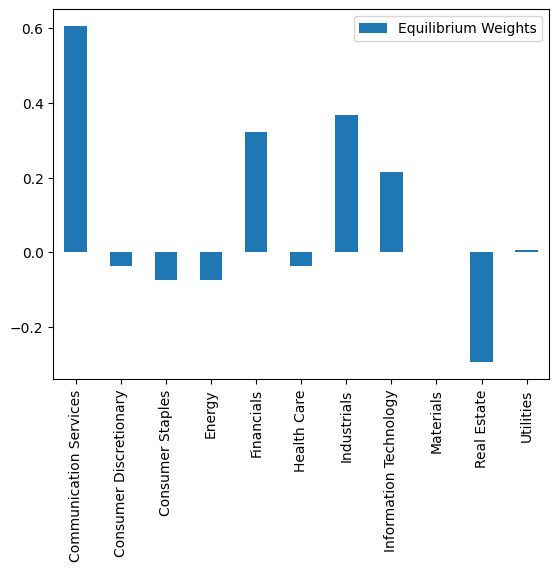

In [22]:
df = pd.DataFrame(weight,
                  columns=sector_mean_returns.columns,
                  index=['Equilibrium Weights'])
df.T.plot(kind='bar')